# Assingment 1

### Name: Mohamed Aboelazaiem Salama
### ID: 40-6227}
### Tutorial: T-28

### Name: Mahmoud Ahmed
### ID: 40-6143
### Tutorial: T-34

# Imports


In [1]:
from PIL import Image
import matplotlib.pyplot as plt

# Generic Functions

In [2]:
def imOpen(imageName):
    img_location = ""
    if('.bmp' not in imageName):
        imageName+='.bmp'
    
    im = Image.open(imageName)
    im2=Image.new("L",im.size)
    for i in range(im2.size[0]):
        for j in range(im2.size[1]):
            r,g,b=im.getpixel((i,j))
            new_value=(int)((0.3*r)+(0.59*g)+(0.11*b))
            im2.putpixel((i,j),new_value)
    return im2
   


def toFile(fileName, img_rle):
    f= open(fileName,"w")
    f.write(img_rle)
    print("File Saved Successfully In The Current Folder")
    f.close()
    
def toStrH(im):
    rle="H "+str(im.size[0])+" "+str(im.size[1])+"\n"
    for i in range(im.size[1]):
        current_color=im.getpixel((0,i))
        current_index=0
        for j in range(1,im.size[0]):
            color=im.getpixel((j,i))
            if(color!=current_color):
                rle+=" "+str(current_color)+" "+str(current_index) +" "+str(j-1)
                current_color=color
                current_index=j
                
        rle+=" "+str(current_color)+" "+str(current_index) +" "+str(j)
        rle+="\n"
    return rle


def toStrV(im):
    rle="V "+str(im.size[0])+" "+str(im.size[1])+"\n"
    for i in range(im.size[0]):
        current_color=im.getpixel((i,0))
        current_index=0
        for j in range(1,im.size[1]):
            color=im.getpixel((i,j))
            if(color!=current_color):
                rle+=" "+str(current_color)+" "+str(current_index) +" "+str(j-1)
                current_color=color
                current_index=j
                
        rle+=" "+str(current_color)+" "+str(current_index) +" "+str(j)
        rle+="\n"
    return rle

def toImg(path):
    f = open(path, "r")
    
    first_line=(f.readline().split())
    rle_type=first_line[0]
    width=int(first_line[1])
    height=int(first_line[2])
    
    im=Image.new("L",(width,height))
    
    index_1=0
    
    for line in f:
        current_line=line.split()        
        for i in range(0,len(current_line),3):   
            color=int(current_line[i])
            start_index=int(current_line[i+1])
            end_index=int(current_line[i+2])
            for i in range(start_index,end_index+1):
                if(rle_type=="V"):
                    im.putpixel((index_1,i),color)    
                else:
                    im.putpixel((i,index_1),color)    
        index_1+=1
    f.close()
    return im



# Testing on Inputs

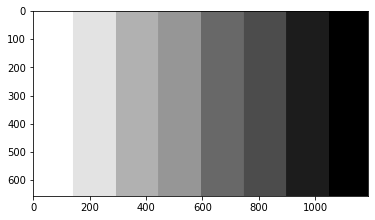

In [3]:
Bars_1=imOpen("Inputs/Bars.bmp")
plt.imshow(Bars_1,cmap="gray")

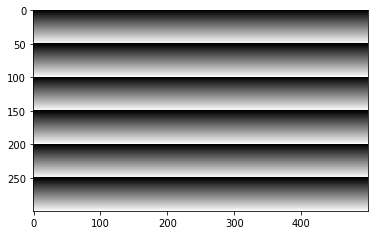

In [4]:
Bars_2=imOpen("Inputs/Bars2.bmp")
plt.imshow(Bars_2,cmap="gray")

In [5]:
Bars_1_V=(toStrV(Bars_1))
toFile("V.txt",Bars_1_V)

Bars_1_H=(toStrH(Bars_1))
toFile("H.txt",Bars_1_H)


File Saved Successfully In The Current Folder
File Saved Successfully In The Current Folder


In [6]:
Bars_2_V=(toStrV(Bars_2))
toFile("V1.txt",Bars_2_V)

Bars_2_H=(toStrH(Bars_2))
toFile("H1.txt",Bars_2_H)

File Saved Successfully In The Current Folder
File Saved Successfully In The Current Folder


In [7]:
print("Number of characters In Bars Vertical RLE : ",len(Bars_1_V))
print("Number of characters In Bars Horizontal RLE : ",len(Bars_1_H))
print("Number of characters In Bars2 Vertical RLE : ",len(Bars_2_V))
print("Number of characters In Bars2 Horizontal RLE : ",len(Bars_2_H))

Number of characters In Bars Vertical RLE :  12498
Number of characters In Bars Horizontal RLE :  238795
Number of characters In Bars2 Vertical RLE :  1624510
Number of characters In Bars2 Horizontal RLE :  3178


In [8]:
print("Number Of Bytes needed to save grayscale Bars  : ",(Bars_1.size[0])*(Bars_1.size[1])," Bytes")
print("Number Of Bytes needed to save grayscale Bars2 : ",(Bars_2.size[0])*(Bars_2.size[1])," Bytes")

Number Of Bytes needed to save grayscale Bars  :  779328  Bytes
Number Of Bytes needed to save grayscale Bars2 :  150000  Bytes


# Comments:

### Bars1
#### Assuming that each character is stored in 1 Byte, When comparing the Vertical (RLE) of Bars1 had a better space complexity ... Horizontal (RLE) also saved space but not as the Vertical. ( Which is obvious since the colors in Bars1 does not change in the vertical lines but only in the horizontal and there is not much of color transitions )

### Bars2
#### As for this one, The Vertical (RLE) used way more space than the original image, While the Horizontal (RLE) saved a lot more space. (Which is obvious knowing that Bars2 and color transitions changes vertically with a lot of color tones )


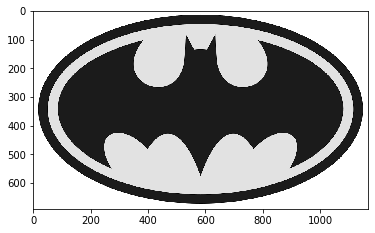

In [9]:
Mystery_1=toImg("Inputs/Mystery1.txt")
plt.imshow(Mystery_1,cmap="gray")

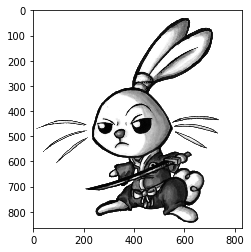

In [10]:
Mystery_2=toImg("Inputs/Mystery2.txt")
plt.imshow(Mystery_2,cmap="gray")